## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Source:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

#### Read the iris.csv file

In [1]:
# Import required library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[15,10]

In [3]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['SepalLengthCm'].nunique()

35

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [5]:
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [6]:
df['SepalLengthCm'].fillna(df.SepalLengthCm.median(),inplace=True)
df['PetalLengthCm'].fillna(df.PetalLengthCm.median(),inplace=True)
df['SepalWidthCm'].fillna(df.SepalWidthCm.median(),inplace=True)
df['PetalWidthCm'].fillna(df.PetalWidthCm.median(),inplace=True)
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['SepalLengthCm'].nunique()

35

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             152 non-null    int64  
 1   SepalLengthCm  152 non-null    float64
 2   SepalWidthCm   152 non-null    float64
 3   PetalLengthCm  152 non-null    float64
 4   PetalWidthCm   152 non-null    float64
 5   Species        152 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [10]:
df['species'].unique()

array([0, 1, 2])

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

<AxesSubplot:>

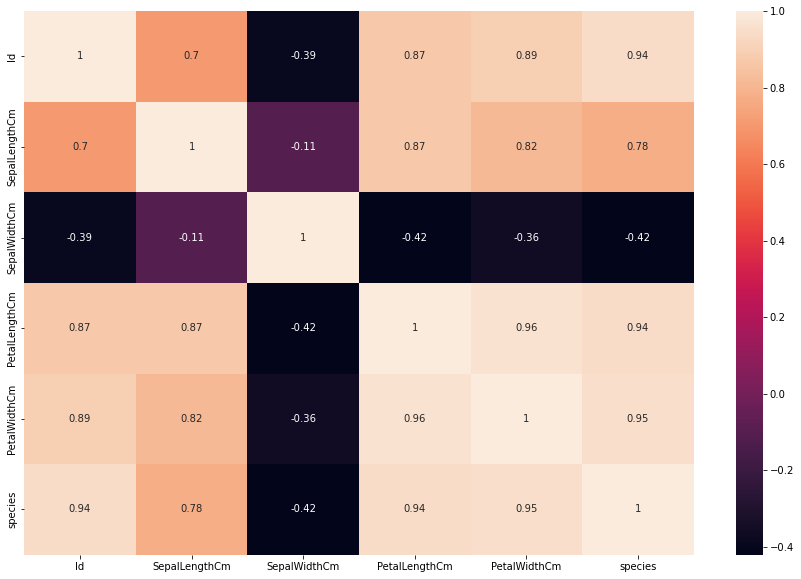

In [11]:
sns.heatmap(df.corr(),annot=True)

 All the independent variables are positively correlated with target variables

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [12]:
x=df.drop(['Id','Species','species'],axis=1)
x.std()

SepalLengthCm    0.822584
SepalWidthCm     0.430757
PetalLengthCm    1.754000
PetalWidthCm     0.759698
dtype: float64

In [13]:
# All independent variables have variance greater than 0.1

## Question 6

*Plot the scatter matrix for all the variables.*

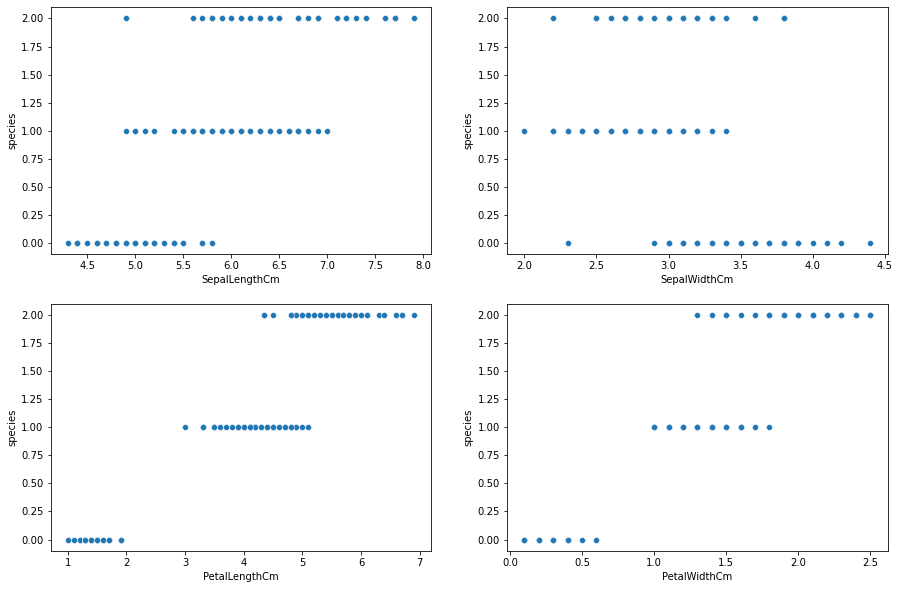

In [14]:
count=1
for i in x.columns:
    plt.subplot(2,2,count)
    sns.scatterplot(x=x[i],y=df['species'])
    count+=1

<AxesSubplot:>

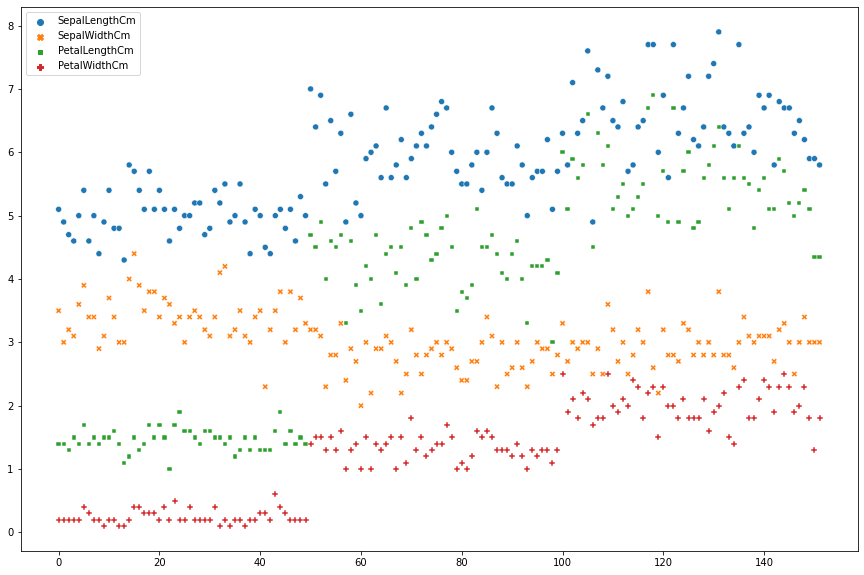

In [15]:
sns.scatterplot(data=x)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,df['species'],test_size=0.2,random_state=10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape,sep='\n')

(121, 4)
(31, 4)
(121,)
(31,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [17]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,confusion_matrix,mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [18]:
l=[]
for i in [3,5,9]:
    knn=KNeighborsClassifier(n_neighbors=i)
    model=knn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    l.append(accuracy_score(y_test,y_pred))

In [19]:
l

[0.9354838709677419, 0.9354838709677419, 0.9354838709677419]

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [20]:
l=[]
for i in np.arange(1,20,2):
    knn = KNeighborsClassifier(i, metric = 'euclidean')
    score = cross_val_score(knn, x_train, y_train, cv = 5,scoring='accuracy')
    l.append(1-score.mean())

In [21]:
l

[0.05800000000000005,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04133333333333322,
 0.04966666666666664]

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

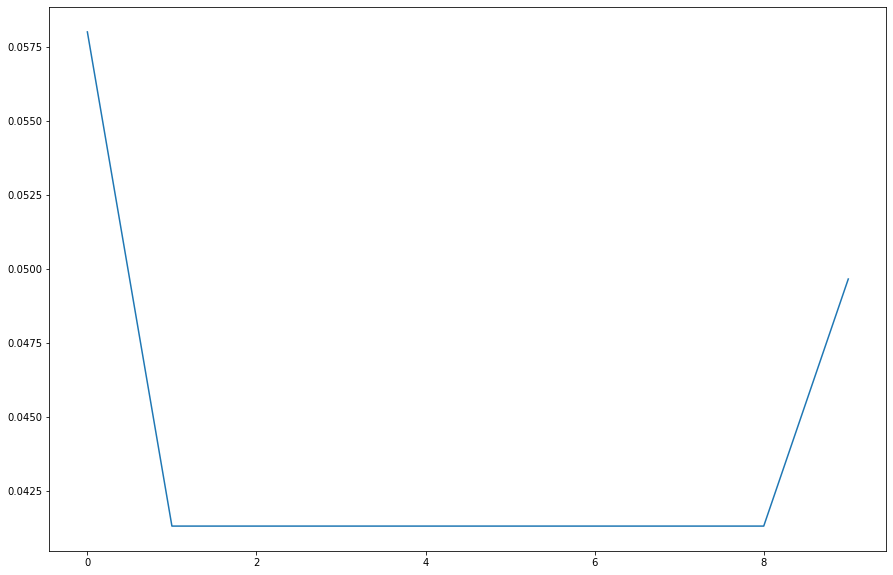

In [22]:
plt.plot(range(10),l)

# Naive Bayes

In [1]:
#Load all required library

### Question 1
#### Import Iris.csv

In [23]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [25]:
df['SepalLengthCm'].fillna(df.SepalLengthCm.median(),inplace=True)
df['PetalLengthCm'].fillna(df.PetalLengthCm.median(),inplace=True)
df['SepalWidthCm'].fillna(df.SepalWidthCm.median(),inplace=True)
df['PetalWidthCm'].fillna(df.PetalWidthCm.median(),inplace=True)
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Question 2
#### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [26]:
y=df['Species']
x=df.drop(['Species','Id'],axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Question 3
#### Find the distribution of target variable (Class)
#### And, Plot the distribution of target variable using histogram

In [27]:
df['species']=le.fit_transform(df['Species'])
y=df['species']
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [28]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Plot the distribution of target variable using histogram

<AxesSubplot:>

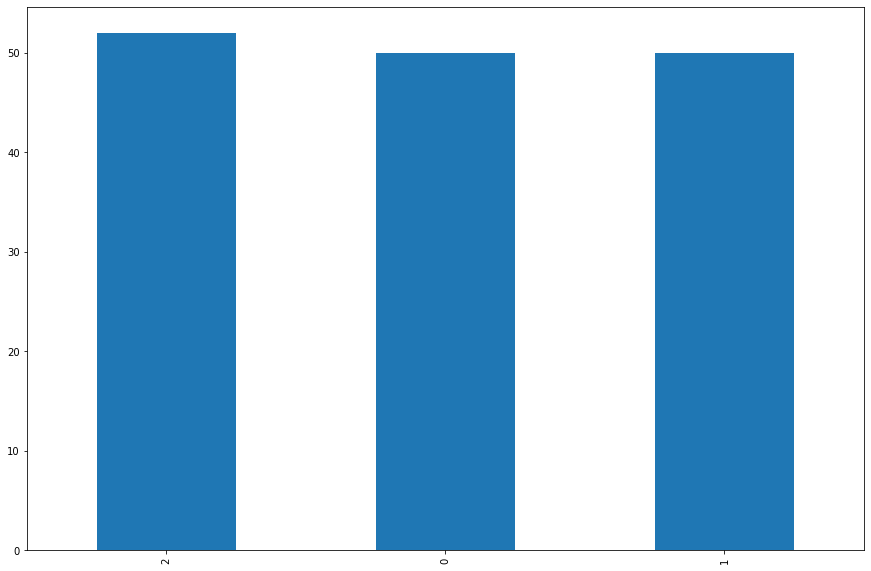

In [29]:
y.value_counts().plot(kind='bar')

In [30]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Plot Scatter Matrix to understand the distribution of variables and give insights from it.

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

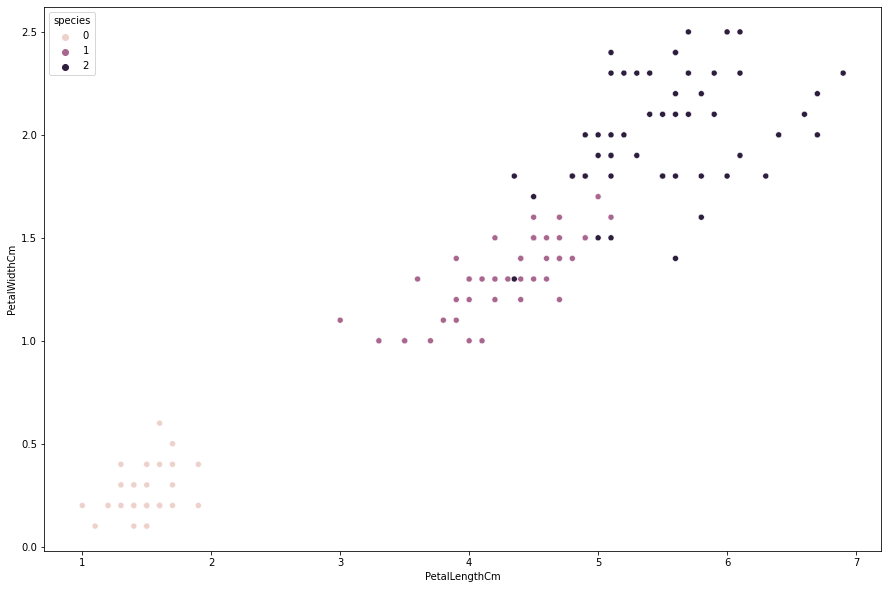

In [31]:
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='species')

In [32]:
# Setosa flower is clearly seperated having average sepal length of 5 and sepal width of 3.5, where as versicolor and virginica 
# are correlated so seperation is not viable

### Question 3
#### Find Correlation among all variables and give your insights 

<AxesSubplot:>

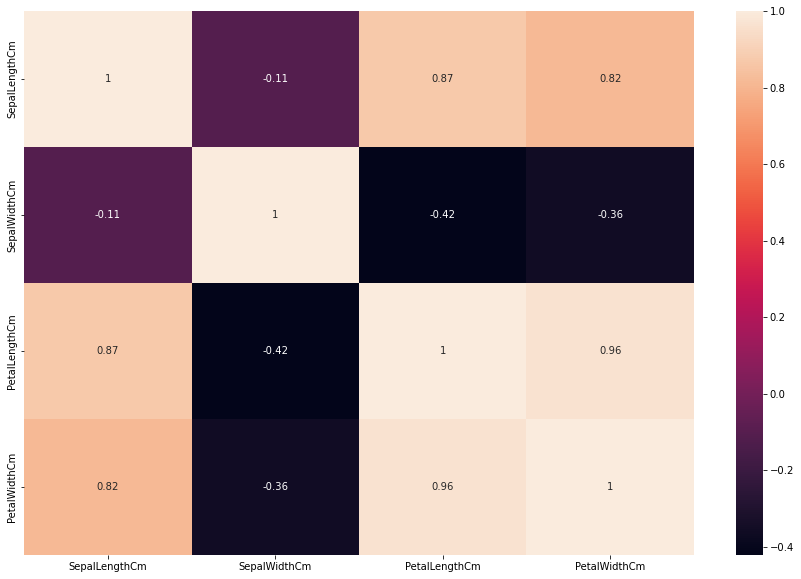

In [33]:
sns.heatmap(x.corr(),annot=True)

In [34]:
# Sepal length,petal length,petal width are positively correlated,while sepal width is weakly correlated

### Question 4
#### Split data in Training and Validation in 80:20

In [37]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=10)

### Question 5
#### Do Feature Scaling 

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [39]:
x_train.shape

(121, 4)

### Question 6 
#### Train and Fit NaiveBayes Model

In [40]:
from sklearn.naive_bayes import GaussianNB

In [41]:
nb=GaussianNB()
model=nb.fit(x_train,y_train)

### Question 7
#### Print Accuracy and Confusion Matrix and Conclude your findings

In [42]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.967741935483871

In [43]:
conf_mat=confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(conf_mat,columns=['predicted 0','predicted 1','predicted 2'],index=['actual 0','actual 1','actual 2'])
matrix

,predicted 0,predicted 1,predicted 2
actual 0,8,0,0
actual 1,0,13,0
actual 2,0,1,9


In [44]:
# the accuracy of the model is 96% 